# KNN(K Nearest Neighbour):-
#K-Nearest Neighbors (KNN) is a supervised machine learning algorithm generally used for classification but can also be used for regression tasks. It works by finding the "k" closest data points (neighbors) to a given input and makes a predictions based on the majority class (for classification) or the average value (for regression). Since KNN makes no assumptions about the underlying data distribution it makes it a non-parametric and instance-based learning method.

K-Nearest Neighbors is also called as a lazy learner algorithm because it does not learn from the training set immediately instead it stores the entire dataset and performs computations only at the time of classification.
K:-k is just a number that tells the algorithm how many nearby points or neighbors to look at when it makes a decision.

# 📚 References

1. KNN Algorithm – Wikipedia
https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm


2. Scikit-learn: KNN Classifier Documentation
https://scikit-learn.org/stable/modules/neighbors.html


3. PIMA Indians Diabetes Dataset (UCI Repository)
https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

In [1]:
# First import the important libraries

In [2]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
           "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

data = pd.read_csv(url, names=columns)


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:

X = data.drop("Outcome", axis=1).values
y = data["Outcome"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Let's first understand some basic concepts and mathematical formulas which is necessary for implementation of KNN from Scratch:-

# 📘 Mathematical Formulas in KNN Model

# 🔹 1. Distance Calculation

# Euclidean Distance (most common for KNN):


#$$d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$


#-------------------------------------------------------------------------------------------------------------------------------------

# 🔹 2. Prediction Rule

#For a test point :

#1. Find the  nearest neighbors based on distance.


#2. Collect their labels.


#3. Predict using majority voting:




#$$\hat{y} = \text{mode}\{ y_{i} \, | \, i \in \text{nearest } k \}$$


#--------------------------------------------------------------------------------------------------------------------------------

# 🔹 3. Confusion Matrix Elements

#For binary classification (Outcome = 0 or 1):

#True Positive (TP): Predicted 1, Actual 1

#False Positive (FP): Predicted 1, Actual 0

#True Negative (TN): Predicted 0, Actual 0

#False Negative (FN): Predicted 0, Actual 1



#--------------------------------------------------------------------------------------------------------------------------------

# 🔹 4. Accuracy

#$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$


#--------------------------------------------------------------------------------------------------------------------------------

# 🔹 5. Precision

#$$\text{Precision} = \frac{TP}{TP + FP}$$


#--------------------------------------------------------------------------------------------------------------------------------

# 🔹 6. Recall (Sensitivity)

#$$\text{Recall} = \frac{TP}{TP + FN}$$


#--------------------------------------------------------------------------------------------------------------------------------

# 🔹 7. F1-score

# Harmonic mean of Precision and Recall:


#$$F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$


#--------------------------------------------------------------------------------------------------------------------------------

# 🔹 8. Weighted Voting (Optional for Weighted KNN)

#If we weight neighbors by inverse distance:


#$$w_i = \frac{1}{d(x, x_i) + \epsilon}$$

#$$\hat{y} = \arg\max_{c} \sum_{i \in \text{nearest } k} w_i \cdot \mathbf{1}(y_i = c)$$
#-----------------------------------------------------------------------------------------------------------------------------

# Now,using the above concepts ,let's implement the KNNClassifier model:-

In [6]:
class KNNClassifier:
    def __init__(self, k=5):
        self.k = k
    
    def fit(self, X_train, y_train):
        # Store training data (lazy learner, no training phase)
        self.X_train = X_train
        self.y_train = y_train
    
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def predict_one(self, x):
        # Compute distances from x to all training points
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        
        # Get indices of k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        
        # Get their labels
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Majority vote
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
    
    def predict(self, X):
        return np.array([self.predict_one(x) for x in X])

In [7]:
# Train model
knn = KNNClassifier(k=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6948051948051948


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix function
def confusion_matrix(y_true, y_pred):
    classes = np.unique(y_true)
    matrix = np.zeros((len(classes), len(classes)), dtype=int)

    for i, true in enumerate(classes):
        for j, pred in enumerate(classes):
            matrix[i, j] = np.sum((y_true == true) & (y_pred == pred))

    return matrix

In [9]:
def classification_report(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tp = np.diag(cm)  # true positives
    fp = cm.sum(axis=0) - tp
    fn = cm.sum(axis=1) - tp
    tn = cm.sum() - (tp + fp + fn)

    precision = tp / (tp + fp + 1e-8)
    recall = tp / (tp + fn + 1e-8)
    f1 = 2 * (precision * recall) / (precision + recall + 1e-8)

    for i in range(len(tp)):
        print(f"Class {i}:")
        print(f"  Precision: {precision[i]:.2f}")
        print(f"  Recall:    {recall[i]:.2f}")
        print(f"  F1-score:  {f1[i]:.2f}")
        print()

    print("Overall Accuracy:", np.mean(y_true == y_pred))

In [10]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Non-Diabetic","Diabetic"],
                yticklabels=["Non-Diabetic","Diabetic"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

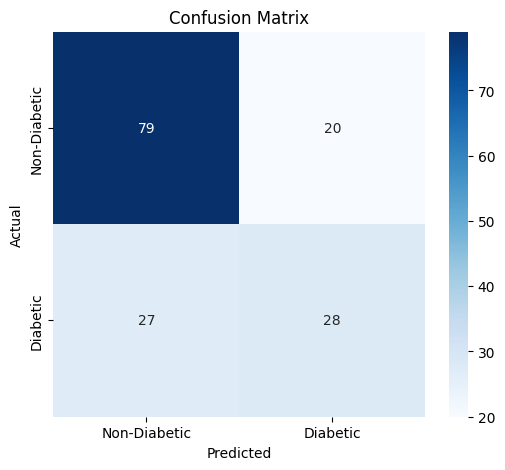

Class 0:
  Precision: 0.75
  Recall:    0.80
  F1-score:  0.77

Class 1:
  Precision: 0.58
  Recall:    0.51
  F1-score:  0.54

Overall Accuracy: 0.6948051948051948


In [11]:
# Predictions with our scratch model
y_pred = knn.predict(X_test)

# Show confusion matrix
plot_confusion_matrix(y_test, y_pred)

# Print classification report
classification_report(y_test, y_pred)

# CONCLUSION:-
#Hence,we implemented KNN algorithm on the PIMA Diabetes Dataset with an accuracy of ~70% along with Conusion Metrics.
#Inshort,KNN is a type of Model which dosen't train the model ,actually it stores the datapoints and use it to find the K-Nearest Neighbour for the given test point and accodeing to the "majority voting",it determines the predictin.